# Step 1 Problem definations


Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Step 2 Import important libraries for operation perform

In [74]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rn

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning model library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Step3. Acquire training and testing data

In [75]:
#acquire train data
train=pd.read_csv("titanic_train.csv")
#acquire test data
test=pd.read_csv("titanic_test.csv")

# Step4. Analyze and Describe Data

In [76]:
# view column
#training data
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [77]:
#test data
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**our target value is 'Survived'**
# Categorical and Continuous Values

** Categorical Value
Ordinal features==> This types are in some ordered or in sorted order for example size of cloths like s<M<L
Nominal features==> They are categorical but does not in any order like color of cloths red,white,black
**

** Continuous Value 
   Continuous value==> Continuos value is not restricated to defined some separete value but any value of continuos range. It is    always numeric in range.
   Time series==> It is a series of data point index in time order  
**


In [78]:
# Data types of training data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [79]:
#see first 20 datasets
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
train.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


**In our view we found that we have ordinal class of categorical value is Pclass and Nomial classes are Survived, Sex, Embarked
continuous data is Fare,Age,SibSp,Parch


In [81]:
#information about datasets train and test
train.info()
print('*'*60)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [82]:
# Descriptive statictics
#distribution about continous data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Richards, Master. William Rowe",male,347082,B96 B98,S
freq,1,577,7,4,644


# Visualizing Training Data to getting insights from it

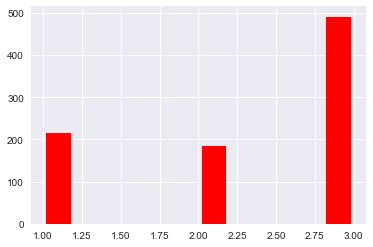

In [85]:
# Univariate analysis for continuous varibales

plt.hist(train['Pclass'],bins=10,color = 'red',histtype = 'bar', rwidth = 0.8)
plt.show()

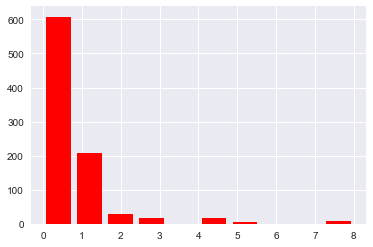

In [86]:
plt.hist(train['SibSp'],bins=10,color = 'red',histtype = 'bar', rwidth = 0.8)
plt.show()

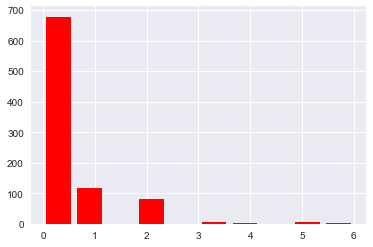

In [87]:
plt.hist(train['Parch'],bins=10,color = 'red',histtype = 'bar', rwidth = 0.8)
plt.show()

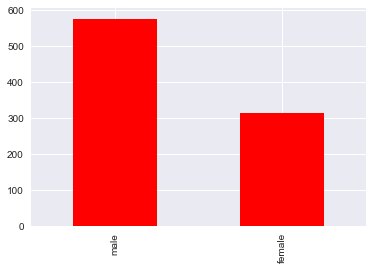

In [88]:
sexcount=train['Sex'].value_counts()
sexcount.plot(kind="bar",color="red")

In [89]:
classsurvived=train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
classsurvived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


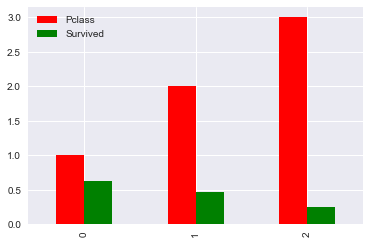

In [90]:
classsurvived.plot(kind="bar",color=["red","green"])
plt.show()

In [91]:
sexsurvived=train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sexsurvived

,Sex,Survived
0,female,0.742038
1,male,0.188908


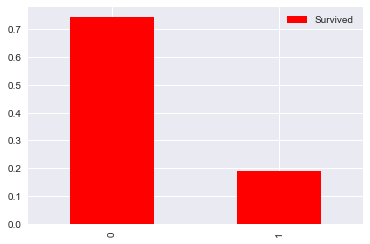

In [92]:
sexsurvived.plot(kind="bar",color=["red","green"])
plt.show()

In [93]:
sibspsur=train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sibspsur

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


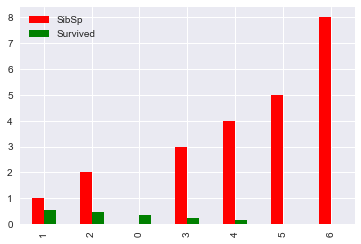

In [94]:
sibspsur.plot(kind="bar",color=["red","green"])
plt.show()

In [95]:
parchsurvived=train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
parchsurvived

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


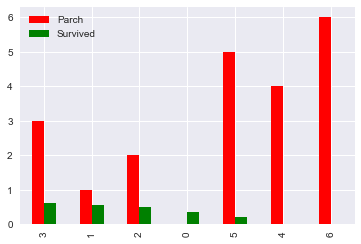

In [96]:
parchsurvived.plot(kind="bar",color=["red","green"])
plt.show()

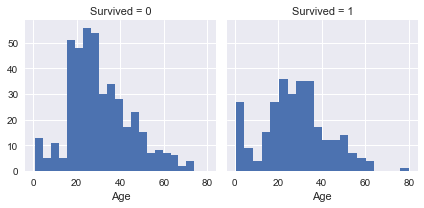

In [97]:
age=sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age', bins=20)

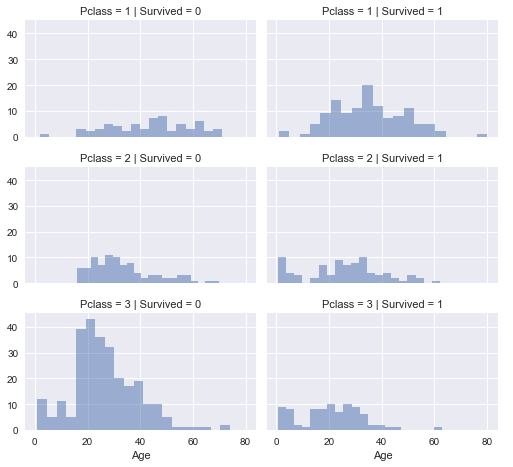

In [98]:
grid=sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

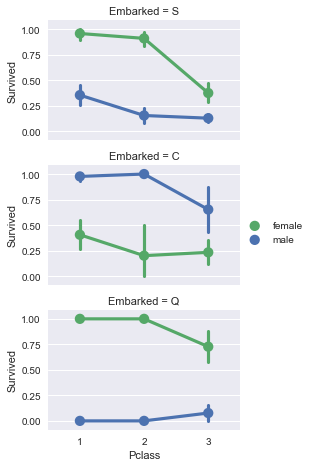

In [99]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

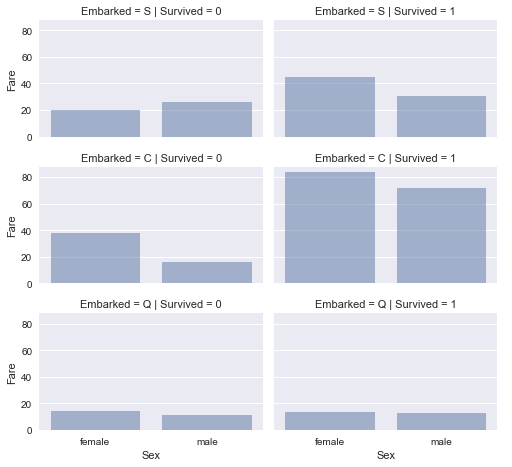

In [100]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [101]:
print("Before" , train.shape , test.shape)

Before (891, 12) (418, 11)


In [102]:
train= train.drop(['Ticket', 'Cabin'], axis=1)
test= test.drop(['Ticket', 'Cabin'], axis=1)

In [103]:
print("After", train.shape, test.shape)

After (891, 10) (418, 9)


In [104]:
combine=[train,test]
for name in combine:
    name['Title']=name.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    print(name['Title'])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object
0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7       

In [105]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [106]:
for name in combine:
    name['Title']=name['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    name['Title'] = name['Title'].replace('Mlle', 'Miss')
    name['Title'] = name['Title'].replace('Ms', 'Miss')
    name['Title'] = name['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# We can convert the categorical title to ordinal 

In [107]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for name in combine:
    name['Title']=name['Title'].map(title_mapping)
    name['Title']=name['Title'].fillna(0)

In [108]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


**Now we can savely drop our name feature from training and testing data sets and we also don't need of passenger id**

In [110]:
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
combine=[train,test]
train.shape,test.shape

((891, 9), (418, 9))

In [111]:
#converting a categorical features
for sex in combine:
    sex['Sex']=sex['Sex'].map({'female':1,'male':0}).astype(int)

In [112]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [113]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


# Now treating with NAN or Null values
**Completing numerical continuos feature**


We can consider three ways to completing features with missing values or null values 
1. A simple way to generate random number between mean and standard deviations
2. Other ways to treating missing values as treating with it other coorealted features In our case we use coorelations among Age Gender and Pclass. Guess Age values using median values for age across set of Pclass and Gender feature combinations.
3. Combine method 1 and 2 but it creates some noise so we use step 2


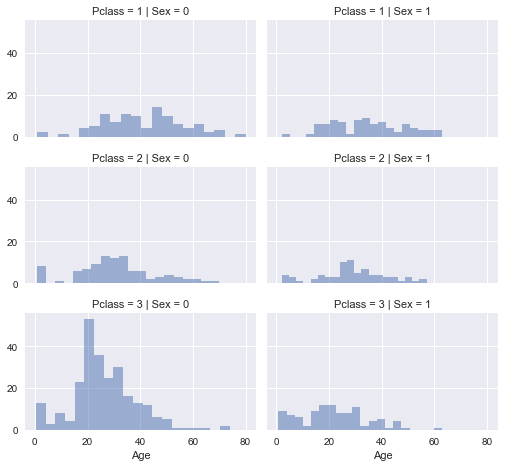

In [114]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [115]:
guess_ages=np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [116]:
for name in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=name[(name['Sex']==i) & (name['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            name.loc[ (name.Age.isnull()) & (name.Sex == i) & (name.Pclass == j+1),'Age'] = guess_ages[i,j]
            
            
    name['Age']=name['Age'].astype(int)        

In [117]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [119]:
#create age band to determine coorelations with survived
train['AgeBand']=pd.cut(train['Age'],5)
agbnd=train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
agbnd

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


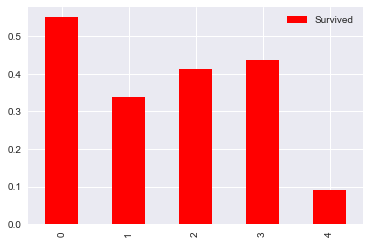

In [120]:
agbnd.plot(kind="bar",color="red")
plt.show()

In [121]:
for age in combine:
    age.loc[age['Age']<=16,'Age']=0
    age.loc[(age['Age']>16) & (age['Age']<=32), 'Age']=1
    age.loc[(age['Age']>32) & (age['Age']<=48), 'Age']=2
    age.loc[(age['Age']>48) & (age['Age']<=64), 'Age']=3
    age.loc[age['Age']>16,'Age']=0


In [122]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [123]:
train=train.drop(['AgeBand'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


# Creating new feature combining existing feature

In [124]:
for adding in combine:
    adding['Familysize']=adding['SibSp']+adding['Parch']+1

In [125]:
famsur=train[['Familysize', 'Survived']].groupby(['Familysize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
famsur

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


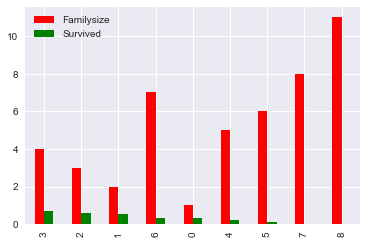

In [126]:
famsur.plot(kind="bar",color=["red","green"])
plt.show()

In [127]:
for alone in combine:
    alone['IsAlone']=0
    alone.loc[alone['Familysize']==1,'IsAlone']=1

In [128]:
alone=train[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()
alone

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


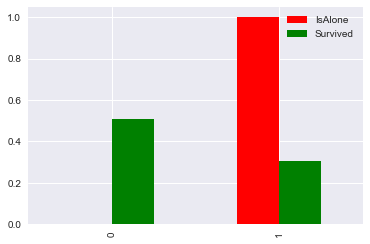

In [129]:
alone.plot(kind="bar",color=["red","green"])
plt.show()

In [130]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [131]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [132]:
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Completing a categorical features

In [133]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [134]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [135]:
embrak=train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
embrak

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


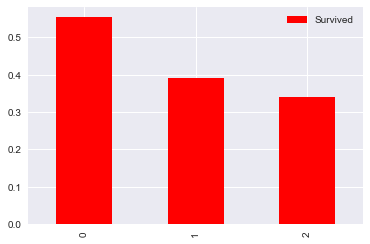

In [136]:
embrak.plot(kind="bar",color="red")

# converting categorical feature into continuous

In [137]:
for datasets in combine:
    datasets['Embarked']=datasets['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [138]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone,Age*Class
0,0,3,0,1,1,0,7.2500,0,1,2,0,3
1,1,1,1,2,1,0,71.2833,1,3,2,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,1,6


# Quick completing and convrting numerical feature

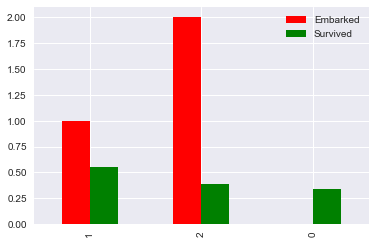

In [139]:
embsur=train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
embsur.plot(kind="bar",color=["red","green"])
plt.show()

In [140]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
fareband=train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
fareband

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


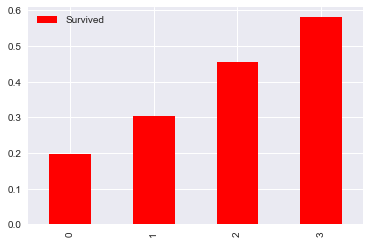

In [141]:
fareband.plot(kind="bar",color=["red"])
plt.show()

In [176]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
    

In [177]:

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone,Age*Class
0,0,3,0,1,1,0,0.0,0,1,2,0,3
1,1,1,1,2,1,0,0.0,1,3,2,0,2
2,1,3,1,1,0,0,0.0,0,2,1,1,3
3,1,1,1,2,1,0,0.0,0,3,2,0,2
4,0,3,0,2,0,0,0.0,0,1,1,1,6


In [178]:
test['Fare']=test.drop("Fare",axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone,Age*Class
0,892,3,0,2,0,0,892,2,1,1,1,6
1,893,3,1,2,1,0,893,0,3,2,0,6
2,894,2,0,3,0,0,894,2,1,1,1,6
3,895,3,0,1,0,0,895,0,1,1,1,3
4,896,3,1,1,1,1,896,0,3,3,0,3


# Model Predict and Solve

In [226]:
X_train=train.drop("Survived",axis=1)
Y_train=train["Survived"]
X_test=test.drop("PassengerId", axis=1).copy()
X_train.shape,X_test.shape,Y_train.shape

((891, 11), (418, 11), (891,))

In [227]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,IsAlone,Age*Class
0,0,3,0,1,1,0,0.0,0,1,2,0,3
1,1,1,1,2,1,0,0.0,1,3,2,0,2
2,1,3,1,1,0,0,0.0,0,2,1,1,3
3,1,1,1,2,1,0,0.0,0,3,2,0,2
4,0,3,0,2,0,0,0.0,0,1,1,1,6


In [228]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.709999999999994

In [185]:
coeff_df=pd.DataFrame(train.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='correlation', ascending=False)

,Feature,correlation
1,Sex,2.217436
7,Title,0.461062
6,Embarked,0.171644
2,Age,0.047105
5,Fare,0.000000
8,Familysize,-0.050692
4,Parch,-0.191031
10,Age*Class,-0.295972
3,SibSp,-0.498331
9,IsAlone,-0.576081


In [186]:
svc=SVC()
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.840000000000003

In [187]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

72.5

In [188]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.469999999999999

In [189]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.120000000000005

In [190]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.590000000000003

In [191]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

F:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


73.290000000000006

In [192]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.760000000000005

In [193]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.760000000000005

In [194]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron','Stochastic Gradient Decent', 'Linear SVC','Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
0,Support Vector Machines,83.84
2,Logistic Regression,81.71
7,Linear SVC,81.59
4,Naive Bayes,80.47
5,Perceptron,79.12
6,Stochastic Gradient Decent,73.29
1,KNN,72.50


In [195]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})

In [197]:
submission.to_csv('submission.csv', index=False)